In [6]:
import datetime
import pathlib

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import earthaccess
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import pandas as pd

In [2]:
!pip install pathlib

In [3]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 109.5 MB/s eta 0:00:00


In [4]:
!pip install earthaccess

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 101.4 MB/s eta 0:00:00


In [5]:
!pip install netCDF4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 51.0 MB/s eta 0:00:00


In [7]:
earthaccess.login() # Login with your EDL credentials if asked

Enter your Earthdata Login username: chhandana
Enter your Earthdata password: ··········


In [8]:
# Search and locate granules
granule_info = earthaccess.search_data(
    short_name="SWOT_L4_DAWG_SOS_DISCHARGE",
    temporal=("2024-04-07", "2025-04-26"),
)
granule_info



[Collection: {'Version': '1', 'ShortName': 'SWOT_L4_DAWG_SOS_DISCHARGE'}
 Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'WestBoundingCoordinate': -166.397, 'SouthBoundingCoordinate': 8.09, 'EastBoundingCoordinate': 8.09, 'NorthBoundingCoordinate': 82.311}]}}}
 Temporal coverage: {'RangeDateTime': {'EndingDateTime': '2024-04-20T05:36:29.000Z', 'BeginningDateTime': '2023-03-29T08:52:24.000Z'}}
 Size(MB): 1927.0171918869019
 Data: ['https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/SWOT_L4_DAWG_SOS_DISCHARGE/na_sword_v16_SOS_unconstrained_0001_20240611T010141_results.nc', 'https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/SWOT_L4_DAWG_SOS_DISCHARGE/na_sword_v16_SOS_unconstrained_0001_20240611T010141_priors.nc'],
 Collection: {'Version': '1', 'ShortName': 'SWOT_L4_DAWG_SOS_DISCHARGE'}
 Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'WestBoundingCoordinate': -166.397, 'SouthB

In [9]:
# Enter a directory path to store downloaded data in
downloads_dir = pathlib.Path("data_downloads")
downloads_dir.mkdir(parents=True, exist_ok=True)

# Select a priors and results pair to explore
download_links = [[link for link in earthaccess.results.DataGranule.data_links(granule)] for granule in granule_info]
print("Select a priors and results file to explore:")
for downloads in download_links:
    for download in downloads:
        if "priors" in download: print(download)



Select a priors and results file to explore:
https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/SWOT_L4_DAWG_SOS_DISCHARGE/na_sword_v16_SOS_unconstrained_0001_20240611T010141_priors.nc
https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/SWOT_L4_DAWG_SOS_DISCHARGE/na_sword_v16_SOS_unconstrained_0001_20240726T123358_priors.nc
https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/SWOT_L4_DAWG_SOS_DISCHARGE/eu_sword_v16_SOS_unconstrained_0001_20240726T123345_priors.nc
https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/SWOT_L4_DAWG_SOS_DISCHARGE/sa_sword_v16_SOS_unconstrained_0001_20240726T123343_priors.nc
https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/SWOT_L4_DAWG_SOS_DISCHARGE/af_sword_v16_SOS_unconstrained_0001_20240726T123343_priors.nc
https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/SWOT_L4_DAWG_SOS_DISCHARGE/oc_sword_v16_SOS_unconstrained_0001_20240726T123327_prior

In [93]:
# Select Europe ("eu") priors file to work with
#priors_link = "https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/SWOT_L4_DAWG_SOS_DISCHARGE/eu_sword_v15_SOS_unconstrained_0001_20240228T205029_priors.nc"
#priors_link = "https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/SWOT_L4_DAWG_SOS_DISCHARGE/eu_sword_v16_SOS_unconstrained_0001_20240726T123345_priors.nc"
#priors_link = "https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/SWOT_L4_DAWG_SOS_DISCHARGE/eu_sword_v16_SOS_unconstrained_0001_20240608T010920_priors.nc"
priors_link = 'https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/SWOT_L4_DAWG_SOS_DISCHARGE/af_sword_v16_SOS_unconstrained_0001_20240726T123343_priors.nc'
# Select results
results_link = priors_link.replace("priors", "results")

earthaccess.download(priors_link, downloads_dir)
earthaccess.download(results_link, downloads_dir)



QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

['data_downloads/af_sword_v16_SOS_unconstrained_0001_20240726T123343_results.nc']

In [94]:
# Open downloaded files to access SoS granule data
priors_download = priors_link.split('/')[-1]
results_download = results_link.split('/')[-1]

priors = nc.Dataset(downloads_dir.joinpath(priors_download), format="NETCDF4")
results = nc.Dataset(downloads_dir.joinpath(results_download), format="NETCDF4")

In [127]:
# Constants

# Select a river
RIVER_NAME = "Olifants River"

# Select a discharge algorithm (hivdi, neobam, metroman, momma, sad, sic4dvar)
DISCHARGE_ALGORITHM = "hivdi"
DISCHARGE_VARIABLE = "Q"

In [128]:
# Display the priors groups
print("Priors Groups:")
print(priors.groups)

Priors Groups:
{'reaches': <class 'netCDF4.Group'>
group /reaches:
    dimensions(sizes): 
    variables(dimensions): int64 reach_id(num_reaches), float64 x(num_reaches), float64 y(num_reaches), <class 'str'> river_name(num_reaches)
    groups: , 'nodes': <class 'netCDF4.Group'>
group /nodes:
    dimensions(sizes): 
    variables(dimensions): int64 node_id(num_nodes), int64 reach_id(num_nodes), float64 x(num_nodes), float64 y(num_nodes), <class 'str'> river_name(num_nodes)
    groups: , 'model': <class 'netCDF4.Group'>
group /model:
    dimensions(sizes): num_months(12), probability(20)
    variables(dimensions): int32 num_months(num_months), int32 probability(probability), float64 flow_duration_q(num_reaches, probability), float64 max_q(num_reaches), float64 monthly_q(num_reaches, num_months), float64 mean_q(num_reaches), float64 min_q(num_reaches), float64 two_year_return_q(num_reaches), int32 area_estimate_flag(num_reaches)
    groups: , 'gbpriors': <class 'netCDF4.Group'>
group /gb

In [129]:
# Display the module groups
print("Results Groups:")
print(results.groups)

Results Groups:
{'reaches': <class 'netCDF4.Group'>
group /reaches:
    dimensions(sizes): 
    variables(dimensions): int64 reach_id(num_reaches), float64 x(num_reaches), float64 y(num_reaches), <class 'str'> river_name(num_reaches), int32 observations(num_reaches), float64 time(num_reaches)
    groups: , 'nodes': <class 'netCDF4.Group'>
group /nodes:
    dimensions(sizes): 
    variables(dimensions): int64 node_id(num_nodes), int64 reach_id(num_nodes), float64 x(num_nodes), float64 y(num_nodes), <class 'str'> river_name(num_nodes), int32 observations(num_nodes), float64 time(num_nodes)
    groups: , 'prediagnostics': <class 'netCDF4.Group'>
group /prediagnostics:
    dimensions(sizes): 
    variables(dimensions): 
    groups: reach, node, 'momma': <class 'netCDF4.Group'>
group /momma:
    dimensions(sizes): 
    variables(dimensions): float64 stage(num_reaches), float64 width(num_reaches), float64 slope(num_reaches), float64 Qgage(num_reaches), float64 seg(num_reaches), float64 n(num

In [130]:
reaches = results.groups['reaches']    # Access the reaches group

print("Reaches Group")
print(reaches, "\n")

print("Longitude")
print(reaches.variables['x'])



Reaches Group
<class 'netCDF4.Group'>
group /reaches:
    dimensions(sizes): 
    variables(dimensions): int64 reach_id(num_reaches), float64 x(num_reaches), float64 y(num_reaches), <class 'str'> river_name(num_reaches), int32 observations(num_reaches), float64 time(num_reaches)
    groups:  

Longitude
<class 'netCDF4.Variable'>
float64 x(num_reaches)
    long_name: longitude
    comment: longitude of the reach center decimal ranging from 180°E to 180°W
    units: degrees_east
    coverage_content_type: coordinate
    valid_min: -180
    valid_max: 180
path = /reaches
unlimited dimensions: 
current shape = (20618,)
filling on, default _FillValue of 9.969209968386869e+36 used


In [131]:
# Unpack the spatial coordinates and river names
reach_lon = results.groups['reaches'].variables['x']
reach_lat = results.groups['reaches'].variables['y']

river_names = results.groups['reaches'].variables['river_name']

# Filter data to only find the river of interest
idx = np.where(river_names[:] == RIVER_NAME)
print(f"Indexes for {RIVER_NAME}:\n {idx}")

Indexes for Olifants River:
 (array([2974, 2975, 2976, 2977, 2979, 2980, 2981, 2987, 2989, 2990, 2991,
       2992, 2993, 3007, 3008, 3009, 3010, 3011, 3012, 3013, 3014, 3019,
       3020, 3021, 3022, 3023, 3024, 3025, 3026, 3027, 3028, 3029, 3030,
       3031, 3032, 3033, 3034, 3035, 3036, 3038, 3039, 3040, 3041, 3042,
       3043, 3044, 3045, 3046, 3047, 3048, 3049]),)


Text(0.5, 1.0, 'Olifants River Reach Centerpoint Locations')

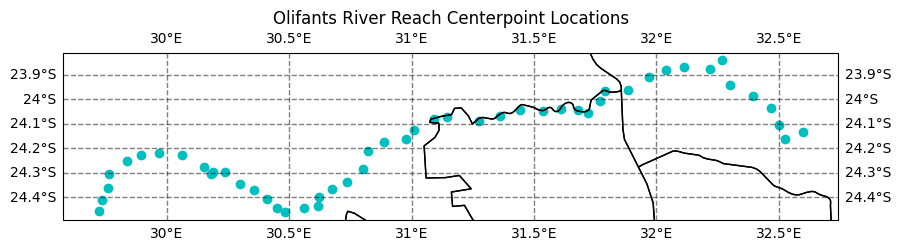

In [132]:
# Plot the location of the river
fig = plt.figure(figsize=(10,10))

# Add map elements gridlines
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.STATES, edgecolor='black')

gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right=False
gl.xlines = True

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# Plot the river reach centerpoint locations
ax.scatter(reach_lon[idx], y=reach_lat[idx], color='c')

# Add the title
plt.title(f'{RIVER_NAME} Reach Centerpoint Locations')


In [133]:
# Locate the indexes for the specific river you are interested in
river_names = results['reaches']['river_name'][:]
reach_idx = np.where(river_names[:] == RIVER_NAME)

# Locate the reach identifiers for the river name
reach_identifiers = results['reaches']['reach_id'][reach_idx]

# Locate the reach identifiers of interest on the node-level
reach_node_identifiers = results['nodes']['reach_id'][:]
node_idx = []
for reach_identifier in reach_identifiers:
    node_idx.extend(np.where(reach_node_identifiers == reach_identifier)[0])

# Locate the node identifiers of interest using the reach identifiers to index
node_identifiers = results['nodes']['node_id'][:]
print(f"Node identifiers: {node_identifiers}")

Node identifiers: [11410000010023 11410000010033 11410000010043 ... 18199600201016
 18199600211026 18199600221036]


In [134]:
# Unpack the spatial coordinates on the node level and index to values of interest
node_lon = results['nodes']['x'][node_idx]
node_lat = results['nodes']['y'][node_idx]
print(f"Longitude #: {node_lon.shape}")
print(f"Latitude #: {node_lat.shape}")

Longitude #: (2528,)
Latitude #: (2528,)


Text(0.5, 1.0, 'Olifants River Node Centerpoint Locations')

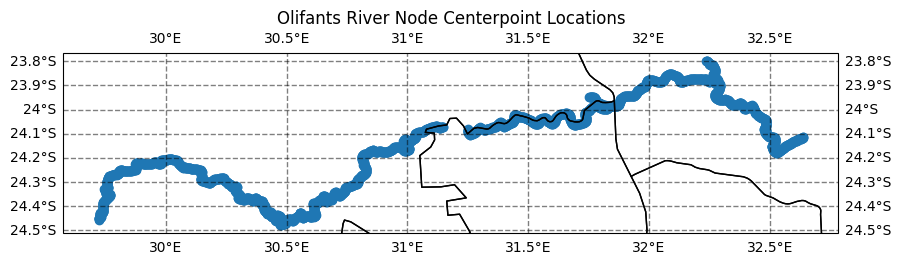

In [135]:
# Plot the nodes
fig = plt.figure(figsize=(10,10))

# Add map elements gridlines
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.STATES, edgecolor='black')

gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right=False
gl.xlines = True

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# Plot the river reach centerpoint locations
ax.scatter(x=node_lon, y=node_lat)

# Add the title
plt.title(f'{RIVER_NAME} Node Centerpoint Locations')



In [136]:
# Retrieve discharge from discharge algorithm group
discharge_algo_q = results[DISCHARGE_ALGORITHM][DISCHARGE_VARIABLE][:]

# Save the missing value
missing = results[DISCHARGE_ALGORITHM][DISCHARGE_VARIABLE].missing_value

# Loop through each reach and filter out places where the missing value is present
data_indexes = []
for i in range(discharge_algo_q.shape[0]):
    if discharge_algo_q[i].shape[0] > 1:
        if np.any(discharge_algo_q[i] != missing): data_indexes.append(i) # For multiple time steps with non-missing values
    if discharge_algo_q[i].shape[0] == 1 and discharge_algo_q[i] != missing: data_indexes.append(i)  # For one time step with non-missing value

# Display the numeric indexes where discharge data is present
print(f"10 indexes for locations that have values:\n {data_indexes[:10]}")



10 indexes for locations that have values:
 [2997, 3020, 3022, 3023, 3026, 3443, 3474, 3883, 3886, 3896]


In [137]:
reach_identifiers = results['reaches']['reach_id'][data_indexes]
print(f"10 reach identifiers for locations that have values:\n {reach_identifiers[:1000]}")

10 reach identifiers for locations that have values:
 [12440400051 12440500141 12440500161 12440500171 12440500201 12551000341
 12552000051 12590000061 12590000091 12590000191 12590000201 12730300251
 12730700141 12730700181 12730700191 12730700201 12730900221 12770901021
 12780100041 12780400201 12793000131 12795000101 12795000111 12795000121
 12795000301 12795000311 12795000321 12795000341 12797100071 12797100081
 12797100091 12797100101 12797300201 12797500221 12797700251 12797900261
 12797900271 12797900281 12797900311 12797900471 12797900481]


In [138]:
# Review what river names are present in the data
print("10 River Names")
print(river_names[data_indexes[:1000]])

river_indexes = np.where(river_names  == RIVER_NAME)
print(f"\nIndexes for the {RIVER_NAME}")
print(river_indexes)

# Locate overlap
overlap_indexes = np.intersect1d(data_indexes, river_indexes)
print(f"\nOverlapping indexes for the {RIVER_NAME} with {DISCHARGE_ALGORITHM.upper()} Discharge data")
print(overlap_indexes)

10 River Names
['Letaba River' 'Olifants River' 'Olifants River' 'Olifants River'
 'Olifants River' 'Mhatuze River' 'Tugela River' 'Breede River'
 'Breede River' 'Breede River' 'Breede River' 'Orange River (Oranje)'
 'Orange River' 'Orange River' 'Orange River' 'Orange River' 'NODATA'
 'Orange River' 'Orange River' 'Caledon River' 'Vaal River' 'Vaal River'
 'Vaal River' 'Vaal River' 'Vaal River' 'Vaal River' 'Vaal River'
 'Vaal River' 'Vaal River' 'Vaal River' 'Vaal River' 'Vaal River'
 'Vaal River' 'Vaal River' 'Vaal River' 'Vaal River' 'Vaal River'
 'Vaal River' 'Vaal River' 'Vaal River' 'Vaal River']

Indexes for the Olifants River
(array([2974, 2975, 2976, 2977, 2979, 2980, 2981, 2987, 2989, 2990, 2991,
       2992, 2993, 3007, 3008, 3009, 3010, 3011, 3012, 3013, 3014, 3019,
       3020, 3021, 3022, 3023, 3024, 3025, 3026, 3027, 3028, 3029, 3030,
       3031, 3032, 3033, 3034, 3035, 3036, 3038, 3039, 3040, 3041, 3042,
       3043, 3044, 3045, 3046, 3047, 3048, 3049]),)

Overlapping

In [139]:
# Select the first reach from the overlapping indexes
data_index = overlap_indexes[1]

# Locate the reach identifier
reach_id = reaches['reach_id'][data_index]
print(f"{RIVER_NAME} reach identifier to plot: {reach_id}")

# Retrieve discharge
discharge_algo_q = discharge_algo_q[data_index]
print(f"\nDischarge for {RIVER_NAME} reach identifier # {reach_id}")
print(discharge_algo_q)

# Retrieve time
time = results['reaches']['time'][data_index]
print(f"\nTime for {RIVER_NAME} reach identifier # {reach_id}")
print(results['reaches']['time'][data_index])

Olifants River reach identifier to plot: 12440500161

Discharge for Olifants River reach identifier # 12440500161
[ 64.08820523  70.4398854   69.76405389 107.30434072 128.12814546
 150.03460532 172.57378319 195.45793151 218.66176773 241.8445928
 264.74890488 285.1337697  307.85817695 281.30568672 247.55119113
 192.14874164 132.78508806 110.88295727  94.69870699  85.14918053
  77.90504244  71.02291285  59.77188546  51.62881046  43.88553256
  36.48097956  28.850744    31.87884758  37.30246623  37.5259532 ]

Time for Olifants River reach identifier # 12440500161
[7.43826605e+08 7.44559028e+08 7.48164439e+08 7.49234720e+08
 7.49967140e+08 7.51037423e+08 7.51769846e+08 7.52840129e+08
 7.53572551e+08 7.54642834e+08 7.55375256e+08 7.56445538e+08
 7.57177962e+08 7.58248244e+08 7.58980668e+08 7.60050950e+08
 7.60783372e+08 7.61853655e+08 7.62586077e+08 7.63656357e+08
 7.65459062e+08 7.67261768e+08 7.67994189e+08 7.69064472e+08
 7.69796894e+08 7.70867178e+08 7.71599600e+08 7.72669881e+08
 7.7340

In [140]:
# Transform time to correct format
swot_ts = datetime.datetime(2000,1,1,0,0,0)
missing_time = results['reaches']['time'].missing_value
time_str = []
for t in time:
    if t == missing_time:
        time_str.append('NO_DATA')
    else:
        time_str.append((swot_ts + datetime.timedelta(seconds=t)).strftime('%Y-%m-%dT%H:%M:%S'))
time_str = np.array(time_str)
print(f"Formatted time: {time_str}")

Formatted time: ['2023-07-28T02:30:04' '2023-08-05T13:57:08' '2023-09-16T07:27:19'
 '2023-09-28T16:45:19' '2023-10-07T04:12:20' '2023-10-19T13:30:23'
 '2023-10-28T00:57:25' '2023-11-09T10:15:28' '2023-11-17T21:42:30'
 '2023-11-30T07:00:34' '2023-12-08T18:27:36' '2023-12-21T03:45:38'
 '2023-12-29T15:12:42' '2024-01-11T00:30:43' '2024-01-19T11:57:47'
 '2024-01-31T21:15:49' '2024-02-09T08:42:51' '2024-02-21T18:00:54'
 '2024-03-01T05:27:57' '2024-03-13T14:45:57' '2024-04-03T11:31:01'
 '2024-04-24T08:16:08' '2024-05-02T19:43:08' '2024-05-15T05:01:12'
 '2024-05-23T16:28:13' '2024-06-05T01:46:18' '2024-06-13T13:13:20'
 '2024-06-25T22:31:21' '2024-07-04T09:58:22' '2024-07-16T19:16:25']


In [141]:
# Filter any missing values out of reach identifier discharge and time
missing_reach_index = np.where(discharge_algo_q != missing)

discharge_algo_q = discharge_algo_q[missing_reach_index]
print(f"Discharge for {RIVER_NAME} reach identfier # {reach_id}")
print(discharge_algo_q)

time_str = time_str[missing_reach_index]
print(f"\nTime for {RIVER_NAME} reach identfier # {reach_id}")
print(time_str)

Discharge for Olifants River reach identfier # 12440500161
[ 64.08820523  70.4398854   69.76405389 107.30434072 128.12814546
 150.03460532 172.57378319 195.45793151 218.66176773 241.8445928
 264.74890488 285.1337697  307.85817695 281.30568672 247.55119113
 192.14874164 132.78508806 110.88295727  94.69870699  85.14918053
  77.90504244  71.02291285  59.77188546  51.62881046  43.88553256
  36.48097956  28.850744    31.87884758  37.30246623  37.5259532 ]

Time for Olifants River reach identfier # 12440500161
['2023-07-28T02:30:04' '2023-08-05T13:57:08' '2023-09-16T07:27:19'
 '2023-09-28T16:45:19' '2023-10-07T04:12:20' '2023-10-19T13:30:23'
 '2023-10-28T00:57:25' '2023-11-09T10:15:28' '2023-11-17T21:42:30'
 '2023-11-30T07:00:34' '2023-12-08T18:27:36' '2023-12-21T03:45:38'
 '2023-12-29T15:12:42' '2024-01-11T00:30:43' '2024-01-19T11:57:47'
 '2024-01-31T21:15:49' '2024-02-09T08:42:51' '2024-02-21T18:00:54'
 '2024-03-01T05:27:57' '2024-03-13T14:45:57' '2024-04-03T11:31:01'
 '2024-04-24T08:16:08

Text(0.5, 0.98, 'Discharge Timeseries from HIVDI for the Ohio River reach identifier: 12440500161.')

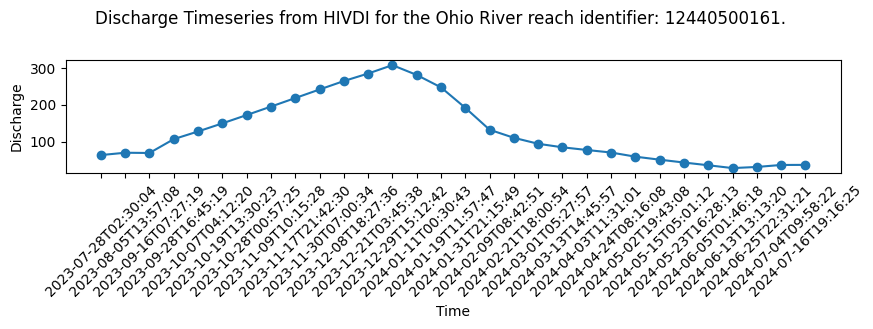

In [142]:
# Plot Discharge for the River Reach Identifier

# Set up plot
fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot(311)

# Plot data
ax1.scatter(time_str, discharge_algo_q)
ax1.plot(time_str, discharge_algo_q)

# Define labels and title
ax1.set_ylabel('Discharge')
ax1.set_xlabel('Time')
plt.xticks(rotation = 45)

plt.suptitle(f"Discharge Timeseries from HIVDI for the Ohio River reach identifier: {reach_id}.")

In [143]:
# Locate MOI discharge results for discharge algorithm making sure to filter out missing values
moi_q = results["moi"][DISCHARGE_ALGORITHM]["q"][data_index]
moi_q = moi_q[missing_reach_index]

print(f"{DISCHARGE_ALGORITHM.upper()} MOI Discharge for {RIVER_NAME} reach identfier # {reach_id}")
print(moi_q)

HIVDI MOI Discharge for Olifants River reach identfier # 12440500161
[-1.e+12 -1.e+12 -1.e+12 -1.e+12 -1.e+12 -1.e+12 -1.e+12 -1.e+12 -1.e+12
 -1.e+12 -1.e+12 -1.e+12 -1.e+12 -1.e+12 -1.e+12 -1.e+12 -1.e+12 -1.e+12
 -1.e+12 -1.e+12 -1.e+12 -1.e+12 -1.e+12 -1.e+12 -1.e+12 -1.e+12 -1.e+12
 -1.e+12 -1.e+12 -1.e+12]


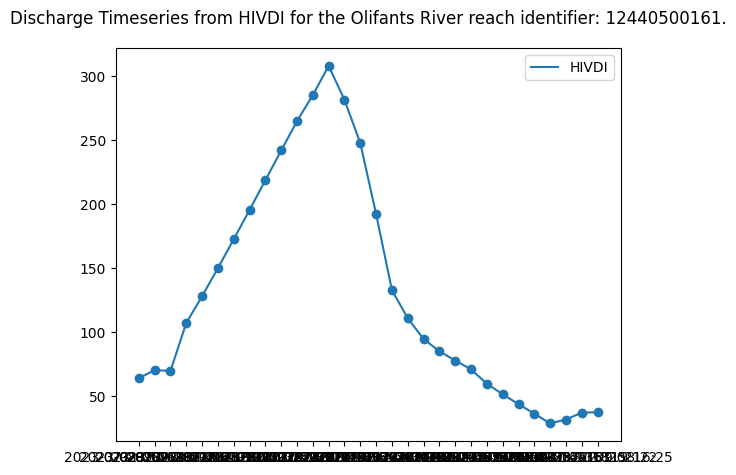

In [144]:
# Plot discharge algorithm alongside MOI discharge

# Discharge algorithm Q
plt.scatter(time_str, discharge_algo_q)
plt.plot(time_str, discharge_algo_q, label=f"{DISCHARGE_ALGORITHM.upper()}")

# MOI Q
#plt.scatter(time_str, moi_q)
#plt.plot(time_str, moi_q, label="MOI")

plt.suptitle(f"Discharge Timeseries from HIVDI for the {RIVER_NAME} reach identifier: {reach_id}.")
plt.legend()
plt.tight_layout()

In [145]:
priors.close()
results.close()